# **04. 피처 스케일링의 효과: BoW에서 tf-idf로 ** 


In [0]:
import json
import pandas as pd 
import numpy as np
import tarfile
import matplotlib.pyplot as plt 
import seaborn as sns 
#from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 데이터 로드

In [0]:
################################ Google Colab <-> Google Drive  mount ##########################
#from google.colab import drive
#drive.mount('/content/drive')

'''
################################ data load #################################################
# https://www.yelp.com/dataset

# tar압축해제
tar = tarfile.open("/content/drive/My Drive/Data/yelp_dataset.tar")
tar.extractall("/content/drive/My Drive/Data")
tar.close()
  
# 비즈니스 데이터 로드 
biz_name = '/content/drive/My Drive/Data/yelp_academic_dataset_business.json'
biz_df = pd.read_json (biz_name, lines= True)

# 컬럼 제한 (비즈니스 데이타, categoreis = 'Restaurants' or 'Nightlife')
biz_df.isnull().any()
biz_df = biz_df.dropna(subset = ['categories'])
biz_df.isnull().any()
two_biz = biz_df [biz_df.apply(lambda x : 'Restaurants' in x['categories'] or 'Nightlife' in x['categories'], axis =1)]

#two_biz.to_csv ('/content/drive/My Drive/Data/two_biz.txt', sep="\t" , index=None)

'''

'\n################################ data load #################################################\n# https://www.yelp.com/dataset\n\n# tar압축해제\ntar = tarfile.open("/content/drive/My Drive/Data/yelp_dataset.tar")\ntar.extractall("/content/drive/My Drive/Data")\ntar.close()\n  \n# 비즈니스 데이터 로드 \nbiz_name = \'/content/drive/My Drive/Data/yelp_academic_dataset_business.json\'\nbiz_df = pd.read_json (biz_name, lines= True)\n\n# 컬럼 제한 (비즈니스 데이타, categoreis = \'Restaurants\' or \'Nightlife\')\nbiz_df.isnull().any()\nbiz_df = biz_df.dropna(subset = [\'categories\'])\nbiz_df.isnull().any()\ntwo_biz = biz_df [biz_df.apply(lambda x : \'Restaurants\' in x[\'categories\'] or \'Nightlife\' in x[\'categories\'], axis =1)]\n\n#two_biz.to_csv (\'/content/drive/My Drive/Data/two_biz.txt\', sep="\t" , index=None)\n\n'

In [0]:
'''
# 리뷰데이터 chunck로 불러오기 
#https://towardsdatascience.com/converting-yelp-dataset-to-csv-using-pandas-2a4c8f03bd88


review_name = '/content/drive/My Drive/Data/yelp_academic_dataset_review.json'

size = 1000000
review = pd.read_json(review_name, lines=True, 
                       dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

# There are multiple chunks to be read
chunk_list = []
for chunk_review in review:
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(two_biz, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)

# After trimming down the review file, concatenate all relevant data back to one dataframe
twobiz_reviews = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

# 필요없는 컬럼 삭제 
twobiz_reviews = twobiz_reviews[['business_id', 'name', 'text', 'review_stars', 'categories']]

# label 추가 
twobiz_reviews['target'] = twobiz_reviews.apply(lambda x : 'Nightlife' in x['categories'], axis=1)

# txt 저장 
twobiz_reviews.to_csv ('/content/drive/My Drive/Data/twobiz_reviews.txt', sep="\t" , index=None)

'''

657669 out of 1,000,000 related reviews
659060 out of 1,000,000 related reviews
660109 out of 1,000,000 related reviews
654546 out of 1,000,000 related reviews
649111 out of 1,000,000 related reviews
670090 out of 1,000,000 related reviews
667404 out of 1,000,000 related reviews
647411 out of 1,000,000 related reviews
11522 out of 1,000,000 related reviews


In [0]:
# 비즈니스 데이터 column = Restaurants, Nightlife로 제한 
two_biz = pd.read_csv ('/content/drive/My Drive/Data/two_biz.txt', sep='\t')
two_biz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
2,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN
4,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."


In [0]:
# categories value 확인 
df_explode  = two_biz.assign(categories = two_biz.categories.str.split(',')).explode('categories')
df_explode.categories.value_counts()[:10]

 Restaurants               44488
Restaurants                19456
 Food                      13979
 Nightlife                 11415
 Bars                      10201
 Sandwiches                 6132
 Fast Food                  6063
 American (Traditional)     5889
 Pizza                      5001
 Breakfast & Brunch         4998
Name: categories, dtype: int64

In [0]:
twobiz_reviews = pd.read_csv ('/content/drive/My Drive/Data/twobiz_reviews.txt', sep='\t')
twobiz_reviews.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,business_id,name,text,review_stars,categories,target
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,I love the empanadas from the Empanadas House!...,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",False
1,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,I ordered feta cheese and spinach empanadas an...,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",False
2,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,I went to the place on Green St today. I went ...,2,"Ethnic Food, Food Trucks, Specialty Food, Impo...",False
3,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,These empanadas are excellent- we are Argentin...,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",False
4,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,These empanadas are HUGE and in my opinion bet...,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",False


In [0]:
twobiz_reviews['target'].value_counts()

False    3788474
True     1488435
Name: target, dtype: int64

# 분류 데이터셋 생성 

Restarants의 갯수 > Nightlife 갯수 

1. Nightlife 10%, Restaurants 2.1% random sampling
2. train, test 7:3 
3. 트레이닝 데이터는 46924개의 고유단어 (bow 피처수) -> 64611개 


In [0]:
##### 1. 10%, 2.1% subdata 생성
#drop NULL, NA  
twobiz_reviews= twobiz_reviews.dropna()

# lambda 아니고, 그냥 pandas function 
nightlife = twobiz_reviews[twobiz_reviews.categories.str.contains('Nightlife', case=False)]
restaurants = twobiz_reviews[twobiz_reviews.categories.str.contains('Restaurants', case=False)]

# 10%, 2.1% 
nightlife_subset = nightlife.sample(frac=0.1, random_state=123)
restaurants_subset = restaurants.sample(frac=0.021, random_state=123)
combined = pd.concat ([nightlife_subset, restaurants_subset])

In [0]:
##### 2. train, test 7:3
from sklearn.model_selection import train_test_split

training_data, test_data = train_test_split (combined, train_size=0.7, random_state=123)

In [0]:
training_data.shape

(178513, 6)

In [0]:
test_data.shape

(76506, 6)

# (3) tf-idf 변환으로 BoW를 스케일링 

tf-idf , Bow, Bow에 대한 l^2 정규화 세가지 테스트 

scikit-learn CountVectorizer -> Bow 



In [0]:
# https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 리뷰 텍스트를 BoW로 변환 
bow_transform = CountVectorizer () 
X_tr_bow = bow_transform.fit_transform(training_data['text'])
X_te_bow = bow_transform.transform(test_data['text']) #test data는 fit_transfomr아니고 transform
len(bow_transform.vocabulary_)

# label data
y_tr = training_data['target']
y_te = test_data['target']

# y=1, 0으로 변경 
y_tr = y_tr.astype('int')
y_te = y_te.astype('int')


In [0]:
#bow_transform.vocabulary_

In [0]:
bow_transform.transform(['This is the second document.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [0]:
# BoW 행렬을 사용해 tf-idf 표현 생성 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize

tfidf_trfm = TfidfTransformer(norm=None) #normalize None
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

# 비교를 위한 BoW에 L2 정규화 
X_tr_l2 = normalize(X_tr_bow, axis=0)
X_te_l2 = normalize(X_te_bow, axis=0)

1. 트레이닝 데이터를 사용해 데스트 데이터를 스케일링 하면 안맞을 수 있다. 
테스트셋에만 있는 새로운 단어 -> 제외 or 'dummy' 단어로 처리  

2. 최종 로지스틱회구분석기로 Restaurants or Nightlife 으로 구분하여 처리 

- 극한값에 강함 (새로운단어, frequent 단어) 

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
## 코드 수정 param _C 
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C):
  if _C == None: 
    m = LogisticRegression().fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
  else: 
    m = LogisticRegression(C=_C).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)

  print('Test score with', description, 'features:', s)
  return m 

In [0]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-norm')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'l2-norm')

'''
Test score with bow features: 0.7801610331215852
Test score with l2-norm features: 0.7445036990562832
Test score with l2-norm features: 0.768070478132434

'''

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test score with bow features: 0.7801610331215852
Test score with l2-norm features: 0.7445036990562832
Test score with l2-norm features: 0.768070478132434


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


BoW 피쳐 사용한 LR이 가장 높다 -> 왜? 

분류기가 잘 튜닝 되어 있지 않기 때문에 

# Parameter tunning 


1.   GridSearch
2.   RandomSearch
3. BayesOpt




In [0]:
# Grid search 

from sklearn.model_selection import GridSearchCV

# 검색할 그리드 지정, 각 피처에 5등분 
param_grid_= {'C':[0.00001, 0.001, 0.1, 1.0, 10.0, 100.0]}
bow_search = GridSearchCV(LogisticRegression(), cv=5, param_grid = param_grid_) #5fold (cv5 )
bow_search.fit(X_tr_bow, y_tr)

l2_search = GridSearchCV(LogisticRegression(), cv=5, param_grid = param_grid_) #5fold (cv5 )
l2_search.fit(X_tr_l2, y_tr)

tfidf_search = GridSearchCV(LogisticRegression(), cv=5, param_grid = param_grid_) #5fold (cv5 )
tfidf_search.fit(X_tr_tfidf, y_tr)

Text(0, 0.5, 'Accuracy')

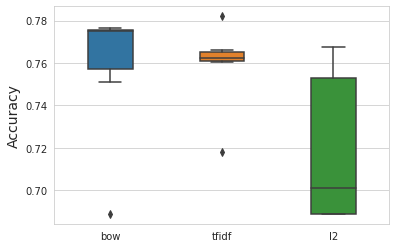

In [0]:
# Matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

search_results  = pd.DataFrame.from_dict({
    'bow':bow_search.cv_results_['mean_test_score'], 
    'tfidf':tfidf_search.cv_results_['mean_test_score'], 
    'l2':l2_search.cv_results_['mean_test_score']
})


sns.set_style("whitegrid")
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)

In [0]:
bow_search.best_params_['C']

0.1

In [0]:
#best_param으로 다시 학습 
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-norm', _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tfidf', _C=tfidf_search.best_params_['C'])

'''
비슷비슷해진다 

Test score with bow features: 0.7796381983112436
Test score with l2-norm features: 0.7728544166470603
Test score with tfidf features: 0.7863958382349097

'''


# tf-idf랑 BoW 랑 결과가 비슷하다! 더 좋은거 맞음?

- 선형모델은 데이터 행렬 활용 (data matrix), 열 벡터인 featrue에 대해 최선의 선형 조합을 찾는 것이 핵심. 
- but BOW벡터는 0이 많은 sparse matrix 
- 0이 많으면 피쳐들사이의 선형성이 적다는 의미, 선형모델적용이 안맞을 수 있다. (계수 x) 
 
- 0많은 이유: 데이터가 비슷하거나 / feature>>>>>>data 갯수 




# 비선형 모델에서는? Neural Net


In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Model Training 
print ("Create model ... ")
def build_model():
    model = Sequential()
    model.add(Dense(1000, input_dim=95481, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print (model.summary())
    return model

Create model ... 


In [39]:
X_tr_tfidf.shape[1:2]

(95481,)

In [0]:
print("Compile model ...")
model = KerasClassifier(build_fn=build_model, epochs=30, batch_size=128)
# Fit the model
history = model.fit(X_tr_tfidf, y_tr, validation_split = 0.3)

Compile model ...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              95482000  
_________________________________________________________________
dropout_14 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_15 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                25050     
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 

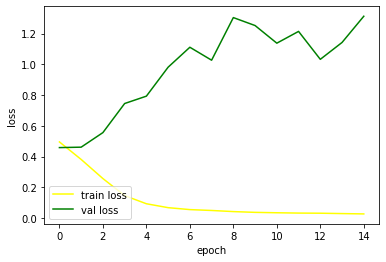

In [36]:
# 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

#acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'yellow', label='train loss')
loss_ax.plot(history.history['val_loss'], 'green', label='val loss')

#acc_ax.plot(history.history['accuracy'], 'blue', label='train acc')
#acc_ax.plot(history.history['val_accuracy'], 'red', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower left')
#acc_ax.legend(loc='upper left')

plt.show()

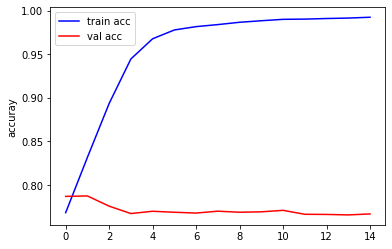

In [37]:
# 시각화
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()


acc_ax.plot(history.history['accuracy'], 'blue', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'red', label='val acc')

loss_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower left')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
# Predictions 
print ("Predict on test data ... ")
y_pred = model.predict(X_te_tfidf)
#y_pred = lb.inverse_transform(y_)

Predict on test data ... 


In [0]:
# Evaluate acc_score 
from sklearn.metrics import accuracy_score
accuracy_score(y_te, y_pred)

0.7674300054897655